# Итоговая работа.

In [148]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [149]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [154]:
import sklearn.metrics as skm

In [155]:
pairs = []
for i in range(raitings.shape[0]):
    pair =[0,0]
    pair[0] = i
    for k in range(raitings.shape[0]):
        if k!=i:
            dist1 = skm.pairwise_distances([raitings[i],raitings[k]], metric='correlation')[0][1]
            if k > 0:
                dist2 = skm.pairwise_distances([raitings[i],raitings[k-1]], metric='correlation')[0][1]
                if dist1<dist2:
                    pair[1] = k
            else:
                pair[1] = k
    pairs.append(pair)

### Ответ:

In [156]:
pairs

[[0, 8],
 [1, 6],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 6],
 [9, 8]]


**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [157]:
import sklearn.decomposition as skd

### Используем для нахождения решения Метод главных компонент

In [158]:
raitings_t = raitings.transpose()

In [159]:
pca = skd.PCA(n_components=5)
res = pca.fit(raitings_t)

In [160]:
res.components_.shape

(5, 10)

In [161]:
res_t = res.components_.transpose()

Ответ - результирующая матрица 10x5:

In [163]:
res_t

array([[-0.31358117,  0.25476945,  0.19083908, -0.21852297, -0.60245219],
       [ 0.3183522 ,  0.08797986, -0.28039111, -0.69901139,  0.05207337],
       [-0.39842075, -0.33594044, -0.12926785, -0.35226532, -0.07047864],
       [ 0.1931435 , -0.467029  ,  0.24678578, -0.29060791, -0.24058591],
       [ 0.06775794,  0.5158211 , -0.43943666, -0.08501525,  0.09401811],
       [ 0.16034486, -0.314959  , -0.67517295,  0.26343614, -0.18599837],
       [ 0.62693275,  0.08089786,  0.36874421,  0.11698808,  0.04529902],
       [ 0.28148124, -0.11655789, -0.14584713,  0.23289713, -0.62204756],
       [-0.15598735,  0.39127865,  0.03216844,  0.18804452, -0.29591552],
       [-0.278146  , -0.24058312, -0.01031015,  0.27417652,  0.22692497]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

Производная, вычисленная вручную:

$2sin(sin(x) + cos(2x+3))*1/(cos^3(sin(x) + cos(2x+3)))*(cos(x)-2*sin(2x+3))$

Значение в заданной точке:

In [187]:
from math import sin, cos, tan

In [188]:
x = 1

In [189]:
df = (2*sin(sin(1)+cos(5))/((cos(sin(1)+cos(5)))**3))*(cos(1)-2*sin(5))
df

55.385917635337854

Производная, вычисленная с помощью python:

In [190]:
from scipy.misc import derivative

In [191]:
def f(x):
    return (tan(sin(x) + cos(2*x+3)))**2

In [192]:
derivative(f, 1.0, dx=1e-6)

55.3859176464222

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [274]:
from scipy.optimize import minimize 

In [275]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [276]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [277]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

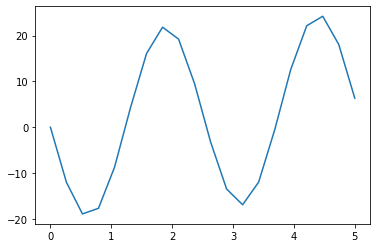

In [278]:
plt.plot(x, fx)
plt.show()

In [279]:
def error(params):
    print(np.sum(np.abs(fx - f(x, params[0], params[1]))))
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

    • scipy.optimize.minimize (+ method=’COBYLA’)
    • scipy.optimize.differential_evolution (+ scipy.optimize.Bounds)

In [303]:
ab0 = [10,10]

In [304]:
res = minimize(error,ab0,method ='nelder-mead',options = {'xtol':1e-8,'disp':True})

264690.5499731483
436369.8832472551
264546.2740045753
160454.91257056146
102796.03365362305
92743.75754935962
15365.888159176993
15638.005175925495
12945.23700447241
4854.0971168696315
14041.974289237236
1165.2094633605104
270.22891441652985
243.43875098856432
245.89489419172227
244.50162722713438
244.63036752454138
244.88055354324786
245.98064723837444
245.82463438988165
530.3934240117019
242.36302072836997
240.1782122681151
239.18584907023114
243.98336391948465
247.64037055068937
233.61572609251553
245.6135904637077
246.24092612886082
238.19047297963147
246.21813965120086
235.18504122904503
236.11824823633938
234.34421228569647
231.64985921938663
229.99083813416254
234.89717737648584
232.5941790000444
228.64284863542386
226.11849137987474
220.8550893297052
211.48884201999888
204.4586500492504
190.2831650748604
122.16928850707416
71.6897451561679
364.117330007591
173.90884861648723
189.61782976453043
52.18328296267008
799.7137486962547
107.23138225708044
292.15752554002563
53.14408230

In [305]:
res.x

array([ 3.        , 21.37610416])

In [306]:
res

 final_simplex: (array([[ 3.        , 21.37610416],
       [ 3.00000001, 21.37610417],
       [ 3.        , 21.37610416]]), array([1.32511774e-05, 1.34214438e-05, 1.34725009e-05]))
           fun: 1.325117738648629e-05
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 81
        status: 0
       success: True
             x: array([ 3.        , 21.37610416])

In [307]:
f(x, res.x[0], res.x[1])

array([  0.        , -12.01819254, -18.90968628, -17.68786494,
        -8.75291106,   4.2752469 ,  16.06801302,  21.81250228,
        19.22059875,   9.48411069,  -3.22272981, -13.48576561,
       -16.9109636 , -11.95866758,  -0.58630193,  12.56873904,
        22.12489363,  24.20292121,  18.04522624,   6.33211023])

In [308]:
fx

array([  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```

